In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 

import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [6]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/landscape_maximizes")

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/mimic")

In [8]:
newdata1 = dict(h5py.File("../data/random/random.hdf5"))
newdata2 = dict(h5py.File("../data/greedy/greedy.hdf5"))
newdata3 = dict(h5py.File("../data/mimic/mimic.hdf5"))
newdata4 = dict(h5py.File("../data/landscape_maximizes/landscape_maximizes.hdf5"))

In [9]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

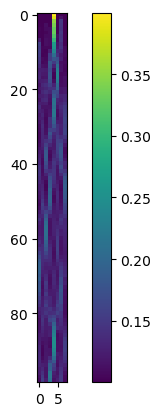

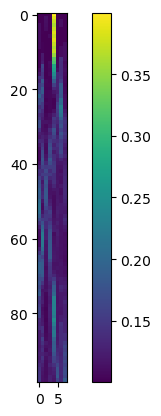

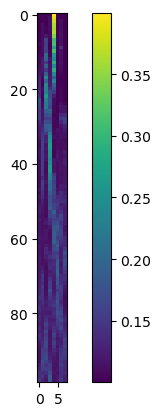

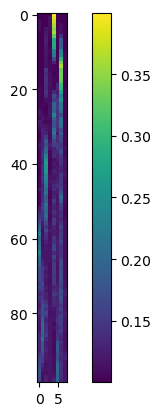

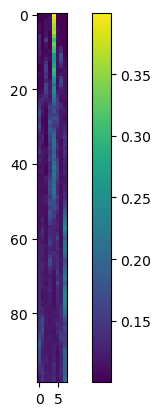

In [9]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata1,size,conn,"random")
        for i in range(1):
            plt.imshow(pops[i][0:99], interpolation='none')
            plt.colorbar()
            plt.show()

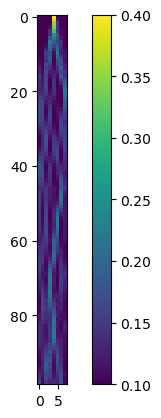

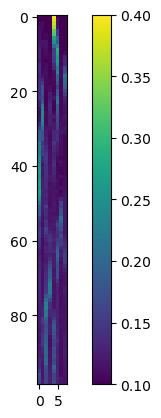

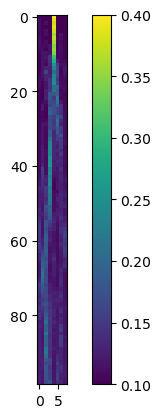

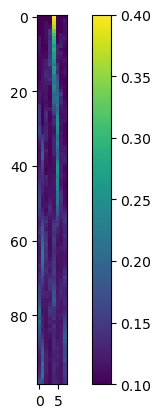

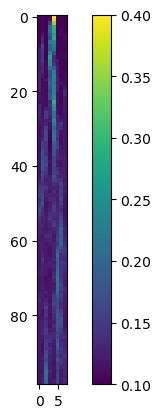

In [12]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata2,size,conn,"greedy")
        for i in range(1):
            plt.imshow(pops[i][0:99], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

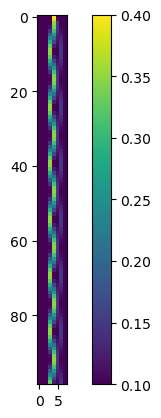

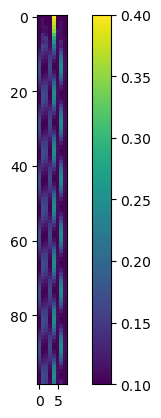

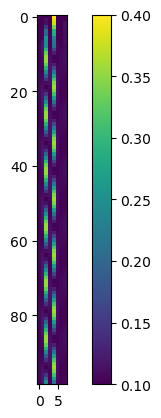

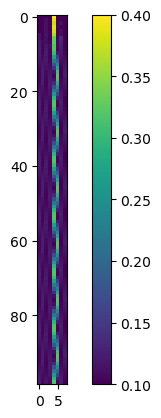

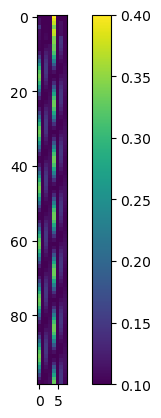

In [13]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata4,size,conn,"landscape_maximizes")
        for i in range(1):
            plt.imshow(pops[i][00:99], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

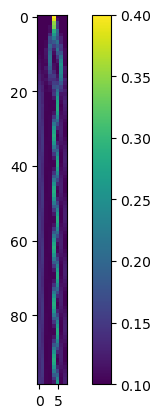

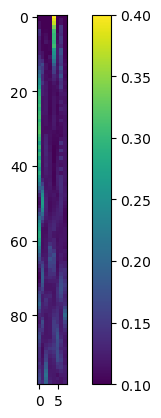

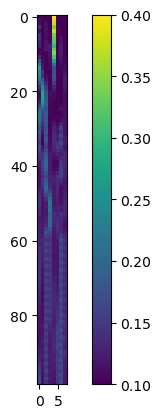

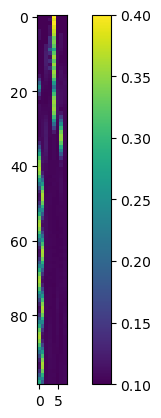

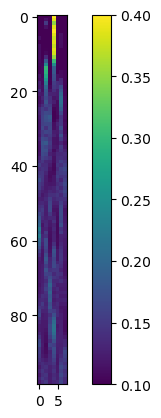

In [14]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata3,size,conn,"mimic")
        for i in range(1):
            plt.imshow(pops[i][0:99], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

In [ ]:
Thermal state 7 cold at 0.2 and one hot at 0.4

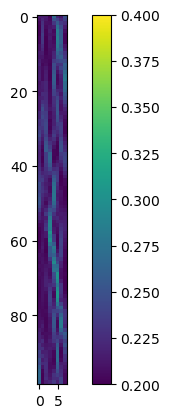

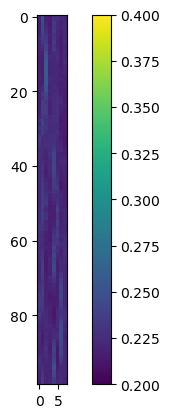

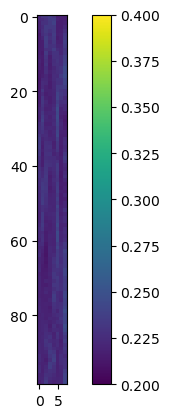

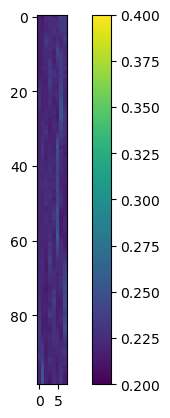

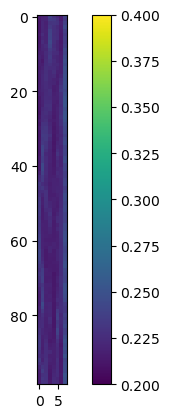

In [98]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.2  # Replace with your desired minimum value
vmax = 0.4 # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata1,size,conn,"random")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_34896/2987688326.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(pops[i][400:499], interpolation='none',norm=norm)


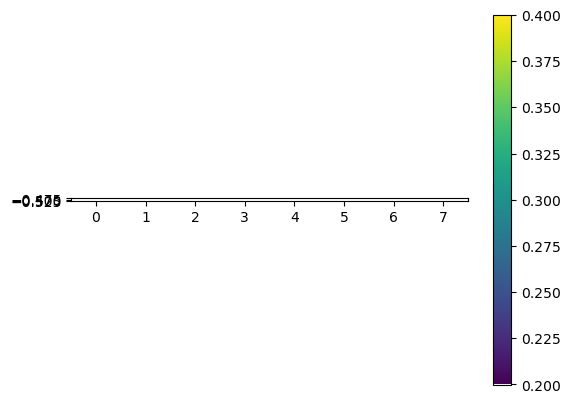

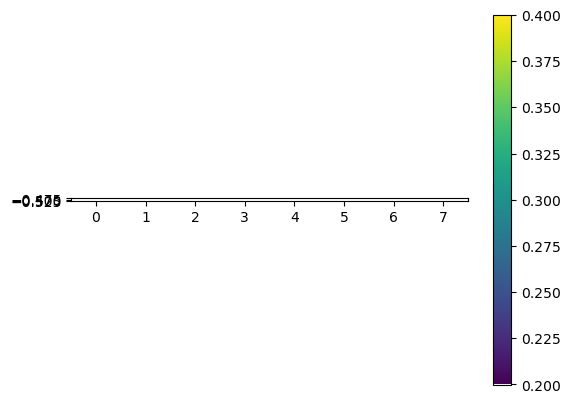

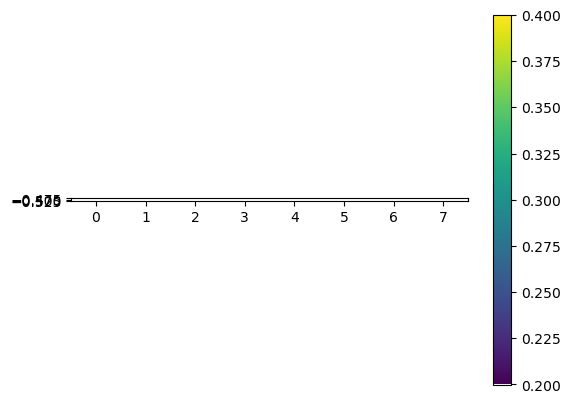

In [20]:
list_conn = ["c2_2local", "c4_2local", "c5_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.2  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata2,size,conn,"greedy")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

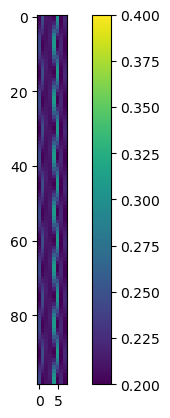

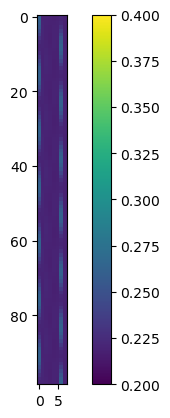

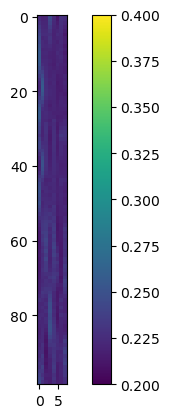

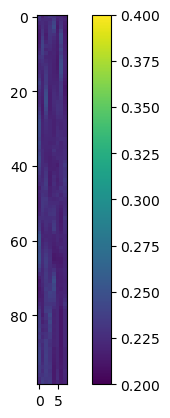

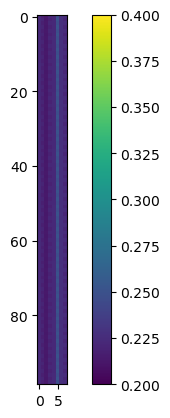

In [93]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.2  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata3,size,conn,"mimic")
        for i in range(1):
            plt.imshow(pops[i][400:499], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

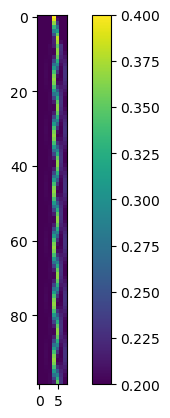

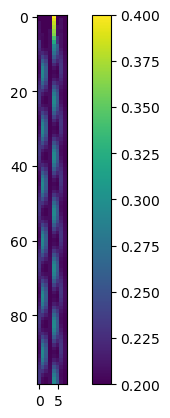

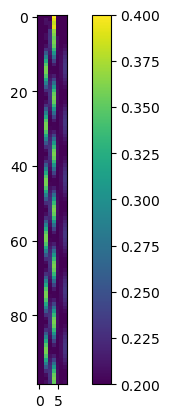

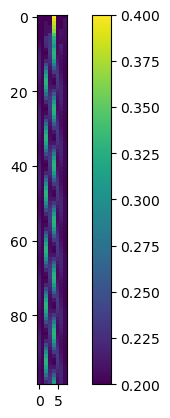

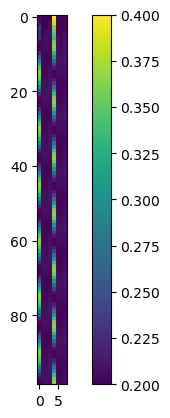

In [96]:
list_conn = ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]
sizes = [8]

# Define your min and max values
vmin = 0.2  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


for conn in list_conn:
    for size in sizes:
        pops = get_pops(newdata4,size,conn,"landscape_maximizes")
        for i in range(1):
            plt.imshow(pops[i][00:99], interpolation='none',norm=norm)
            plt.colorbar()
            plt.show()

In [ ]:
Big data analysis:

In [ ]:
Ensemble average across 100 data sets

In [10]:
num=8

In [11]:
import numpy as np

def ensemble_averaged_one_point_measures_mean_std(datasets):
    # Assuming datasets is a list of 100 datasets, where each dataset is a 2D array of shape (100, N)
    # Stack datasets into a 3D array
    stacked_data = np.stack(datasets)  # Shape (100, 100, N)

    # Take the ensemble average along the first axis (averaging over all datasets)
    ensemble_average = np.mean(stacked_data, axis=0)  # Shape (100, N)

    # Calculate the standard deviation along the first axis
    ensemble_std = np.std(stacked_data, axis=0) 
    return (ensemble_average, ensemble_std)

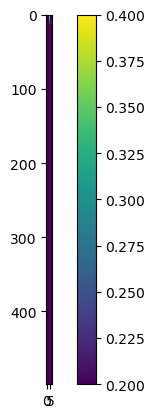

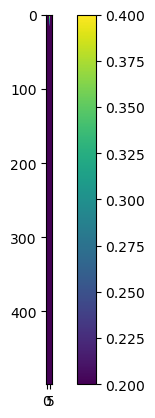

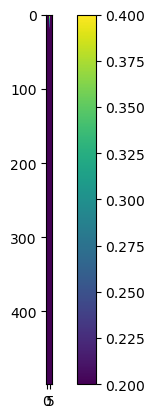

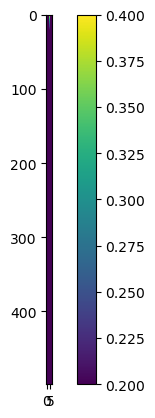

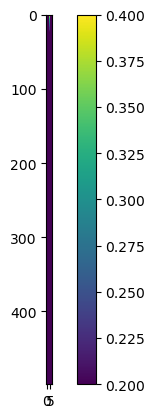

In [12]:
# Define your min and max values
vmin = 0.2  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
for conn in ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]:
    pops = get_pops(newdata1,num,conn,"random").tolist()
    es_evg=ensemble_averaged_one_point_measures_mean_std(pops)
    plt.imshow(es_evg[0][0:499], interpolation='none',norm=norm)
    plt.colorbar()
    plt.show()

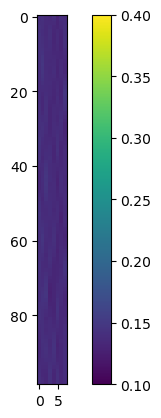

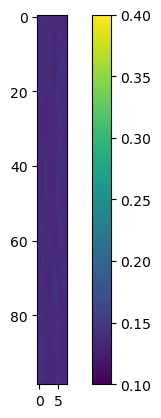

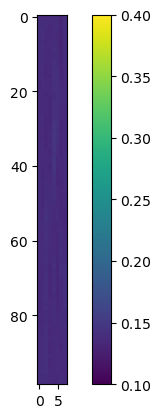

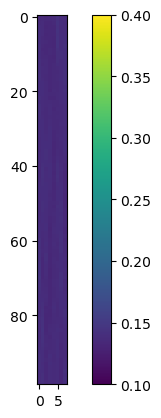

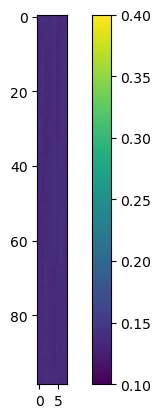

In [13]:
# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
for conn in ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]:
    pops = get_pops(newdata2,num,conn,"greedy").tolist()
    es_evg=ensemble_averaged_one_point_measures_mean_std(pops)
    plt.imshow(es_evg[0][400:499], interpolation='none',norm=norm)
    plt.colorbar()
    plt.show()

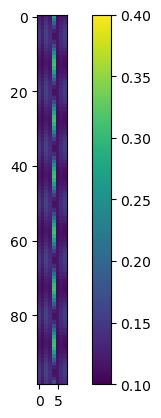

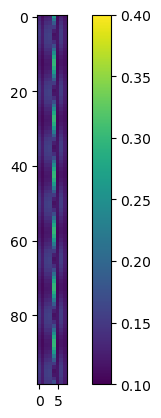

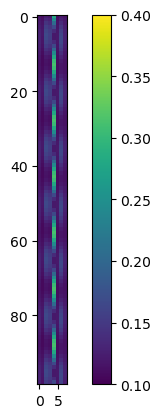

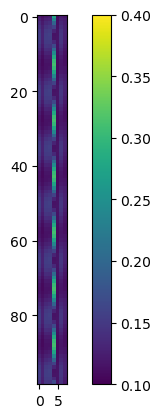

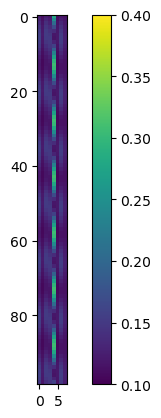

In [14]:
# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
for conn in ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]:
    pops = get_pops(newdata4,num,conn,"landscape_maximizes").tolist()
    es_evg=ensemble_averaged_one_point_measures_mean_std(pops)
    plt.imshow(es_evg[0][400:499], interpolation='none',norm=norm)
    plt.colorbar()
    plt.show()

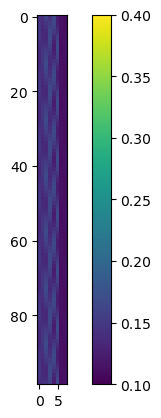

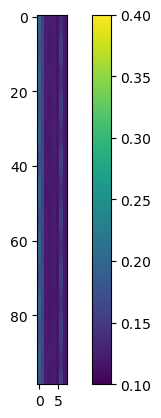

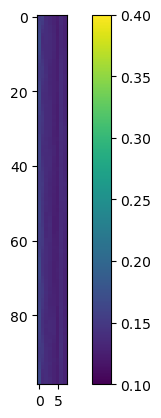

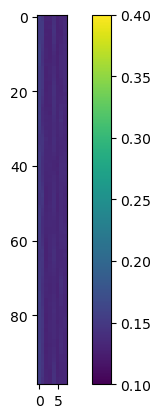

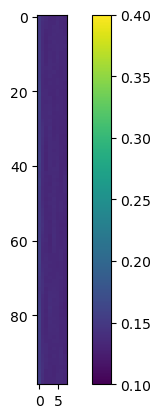

In [15]:
# Define your min and max values
vmin = 0.1  # Replace with your desired minimum value
vmax = 0.4  # Replace with your desired maximum value
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
for conn in ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]:
    pops = get_pops(newdata3,num,conn,"mimic").tolist()
    es_evg=ensemble_averaged_one_point_measures_mean_std(pops)
    plt.imshow(es_evg[0][400:499], interpolation='none',norm=norm)
    plt.colorbar()
    plt.show()

In [ ]:
#Std in pops

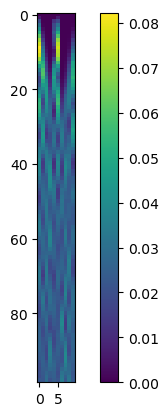

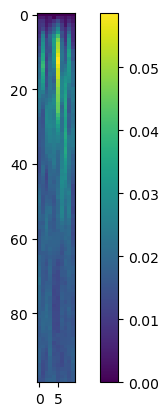

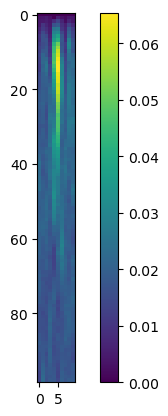

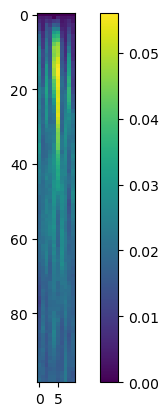

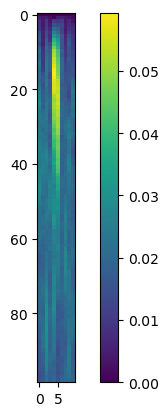

In [124]:
for conn in ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]:
    pops = get_pops(newdata1,num,conn,"random").tolist()
    es_evg=ensemble_averaged_one_point_measures_mean_std(pops)
    plt.imshow(es_evg[1][00:99], interpolation='none')
    plt.colorbar()
    plt.show()

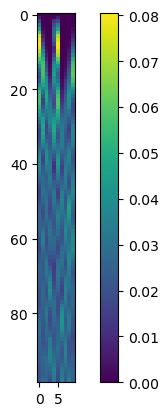

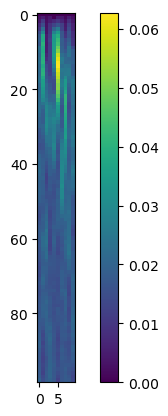

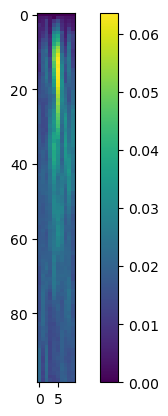

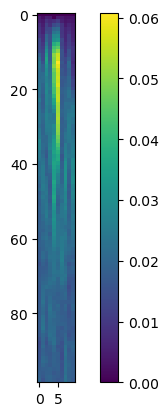

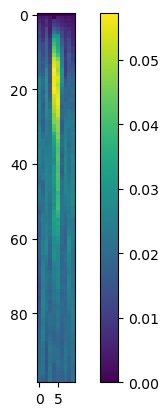

In [125]:
for conn in ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]:
    pops = get_pops(newdata2,num,conn,"greedy").tolist()
    es_evg=ensemble_averaged_one_point_measures_mean_std(pops)
    plt.imshow(es_evg[1][00:99], interpolation='none')
    plt.colorbar()
    plt.show()

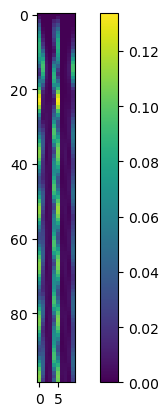

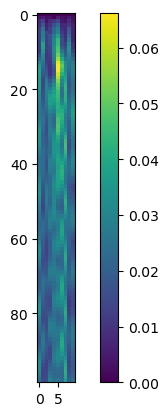

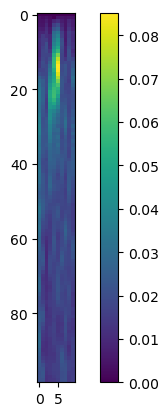

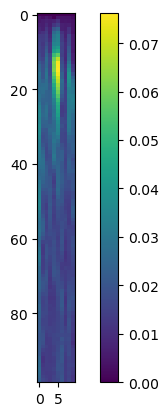

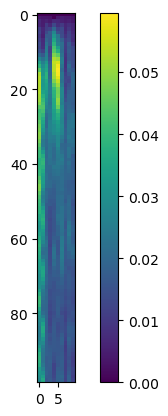

In [126]:
for conn in ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]:
    pops = get_pops(newdata3,num,conn,"mimic").tolist()
    es_evg=ensemble_averaged_one_point_measures_mean_std(pops)
    plt.imshow(es_evg[1][00:99], interpolation='none')
    plt.colorbar()
    plt.show()

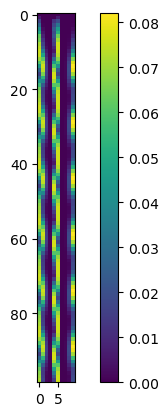

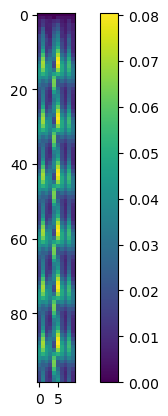

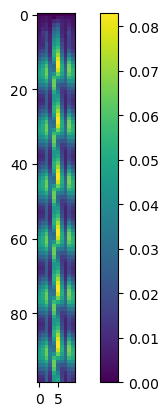

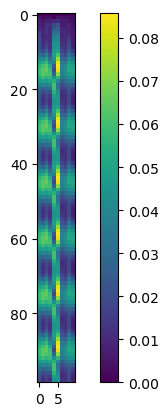

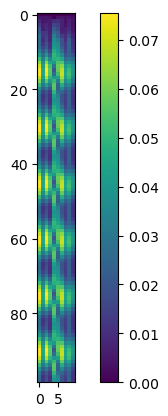

In [127]:
for conn in ["c2_2local", "c4_2local", "c5_2local", "c6_2local", "cN_2local"]:
    pops = get_pops(newdata4,num,conn,"landscape_maximizes").tolist()
    es_evg=ensemble_averaged_one_point_measures_mean_std(pops)
    plt.imshow(es_evg[1][00:99], interpolation='none')
    plt.colorbar()
    plt.show()

In [ ]:
Time averaged

In [16]:
import numpy as np

def time_averaged_one_point_measures_at_t(dataset,t):
    # Assuming dataset is list of 100 lists i.e. one trial
    #stack datasets in 3D
    # Take the ensemble average along the first axis (averaging over all datasets)
    sum_till_t = np.sum(dataset[:t], axis=0)
    time_average_t = (1/(t+1))*(sum_till_t)
    return (time_average_t)

In [17]:
def time_averaged_one_point_measures_matrix_full_sim(dataset):
    # Take the ensemble average along the first axis (averaging over all datasets)
    time_average=[]
    for t in range(len(dataset)):
        time_average.append(time_averaged_one_point_measures_at_t(dataset,t))
    return (time_average)

In [97]:
data=time_averaged_one_point_measures_matrix_full_sim(pops[50])
num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
data=np.array(data[1:99])

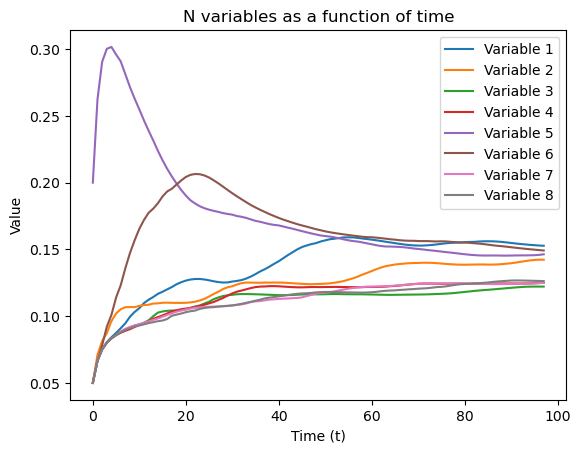

In [98]:
import matplotlib.pyplot as plt
import numpy as np

data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]


# Plot each number as a function of t
for i, y_values in enumerate(data_transposed):
    plt.plot(t, y_values, label=f'Variable {i+1}')
plt.figure(figsize=(20, 8))

# Add labels and legend
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.title('N variables as a function of time')
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


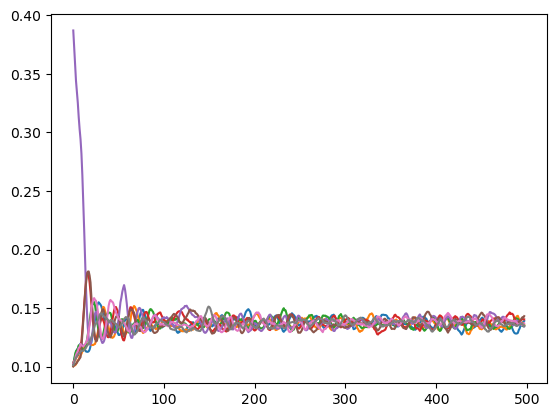

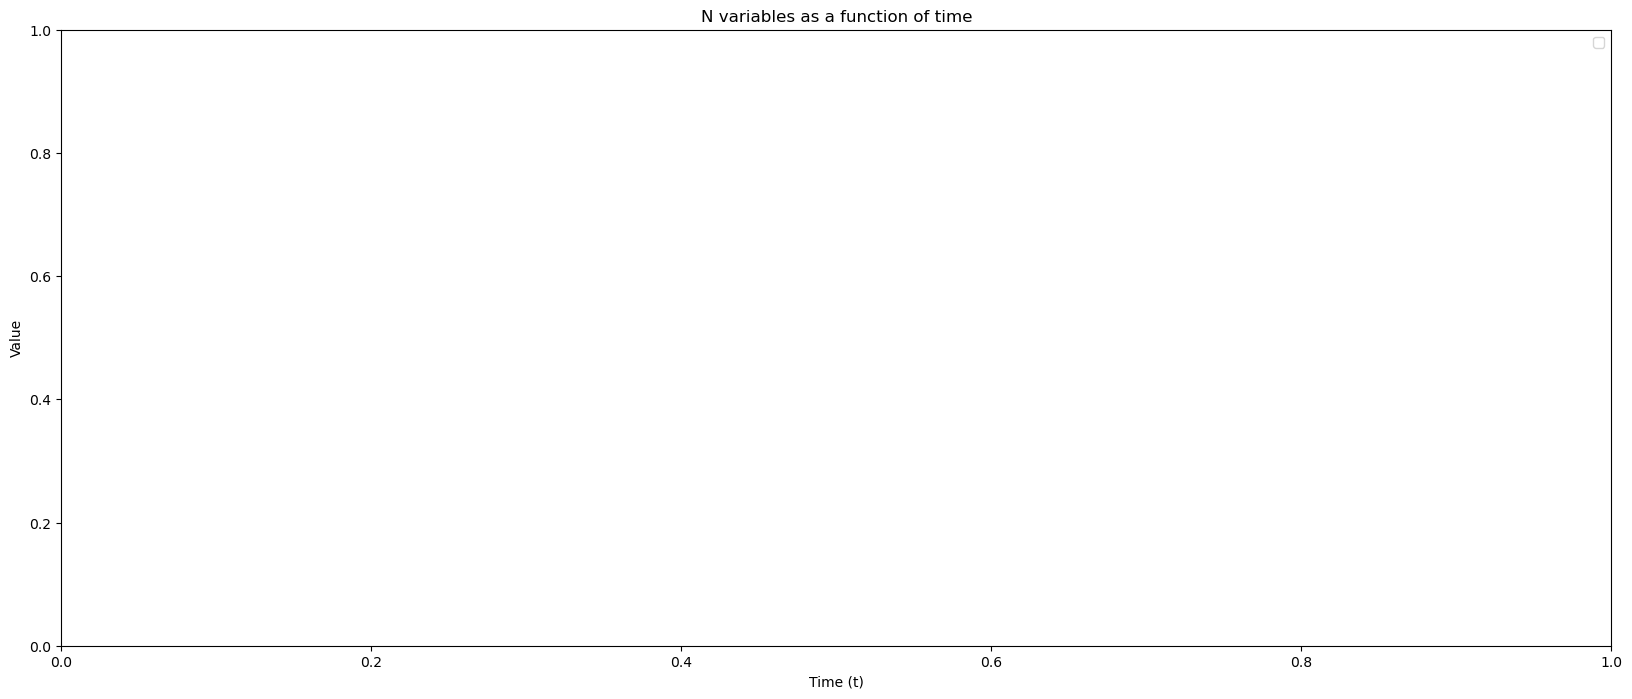

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


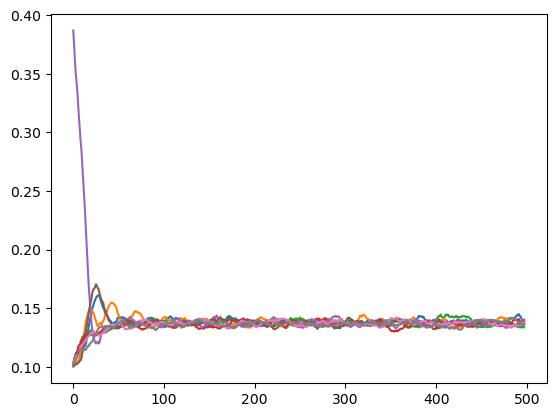

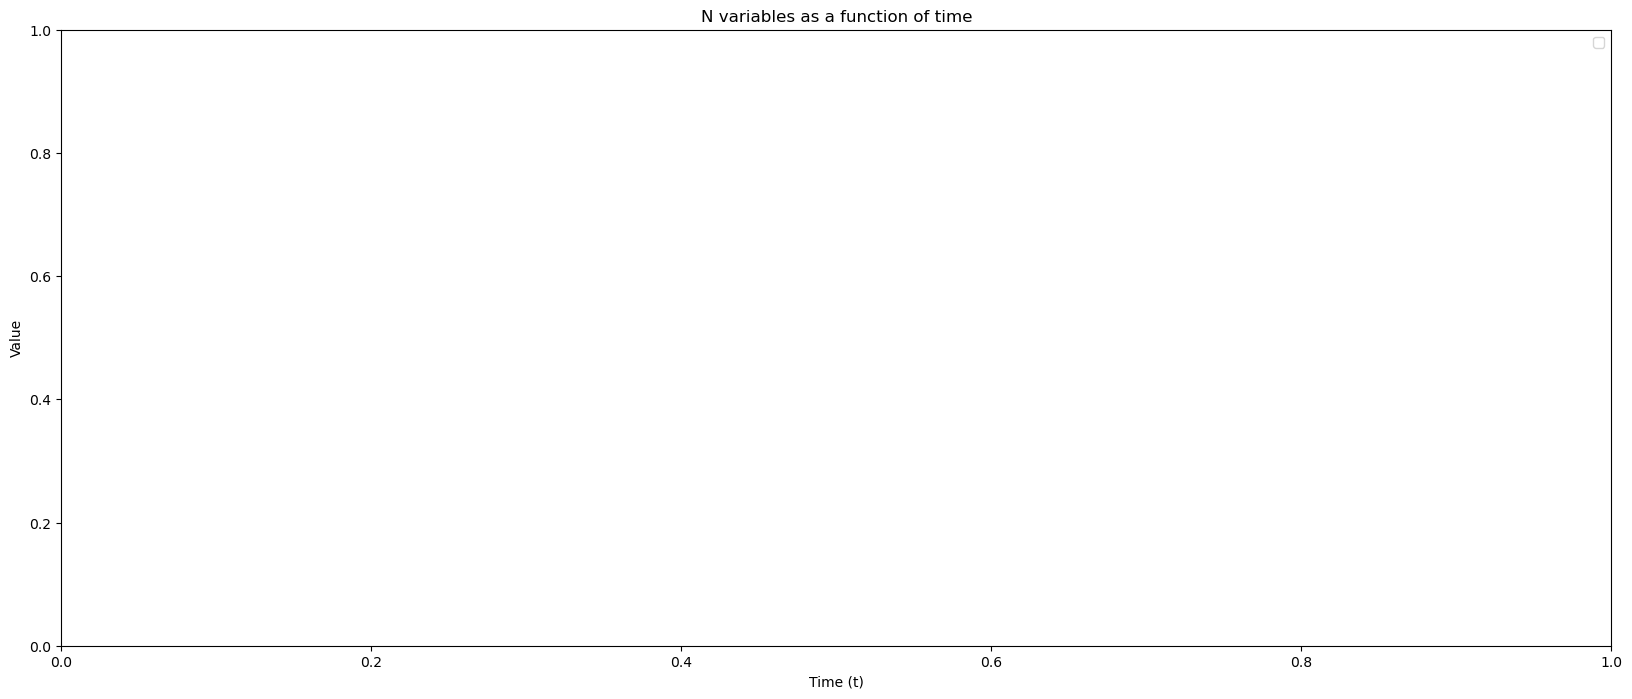

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


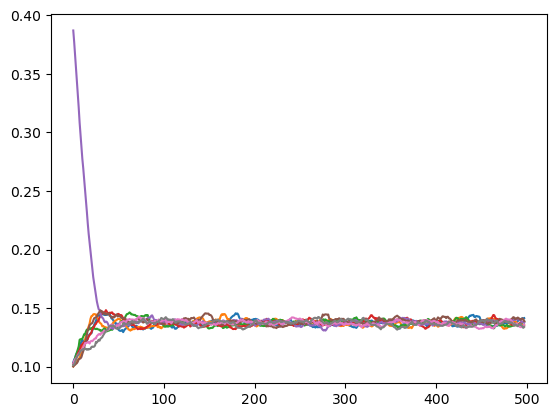

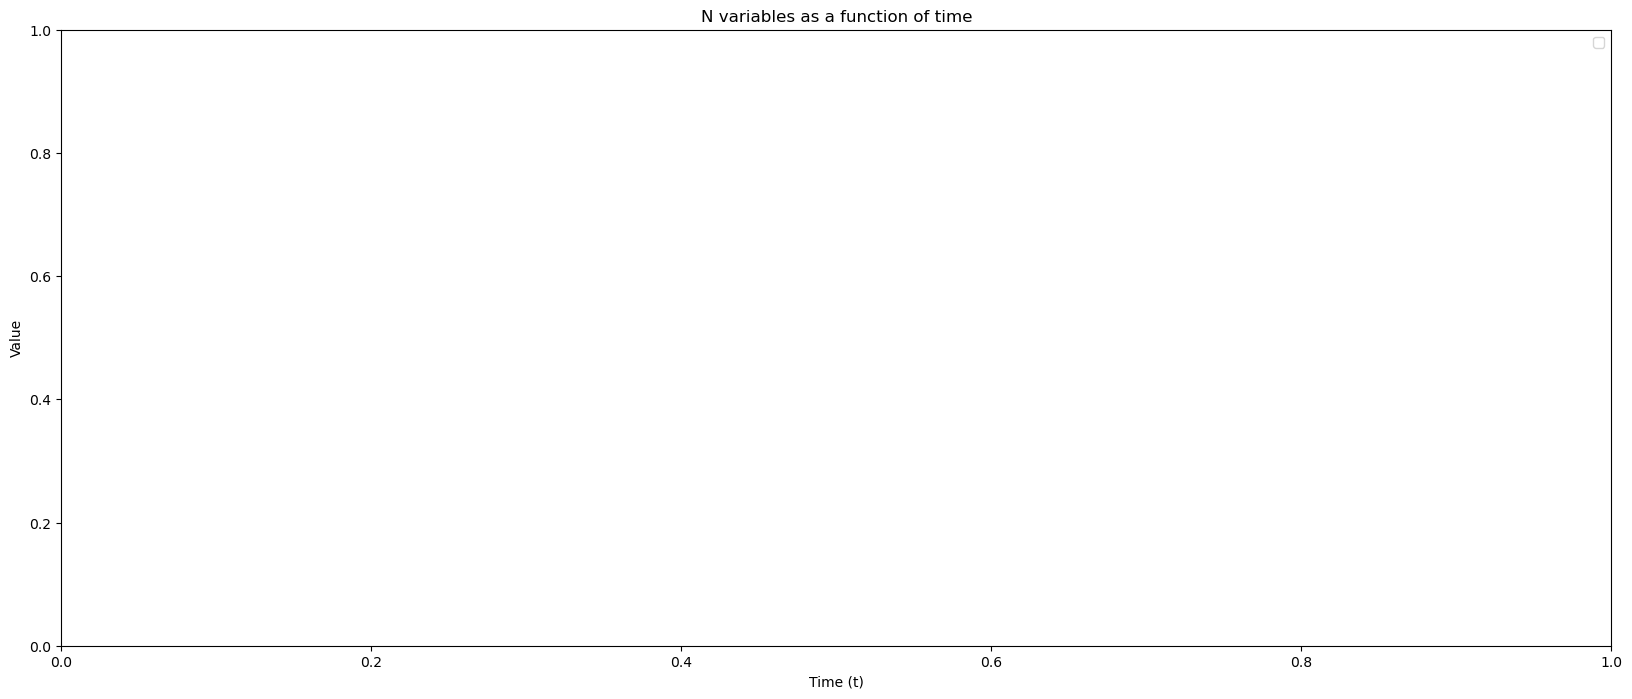

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


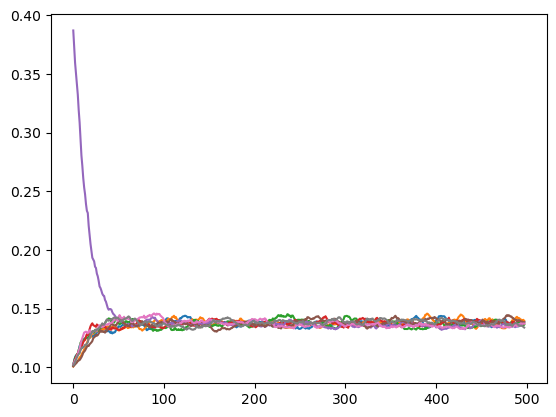

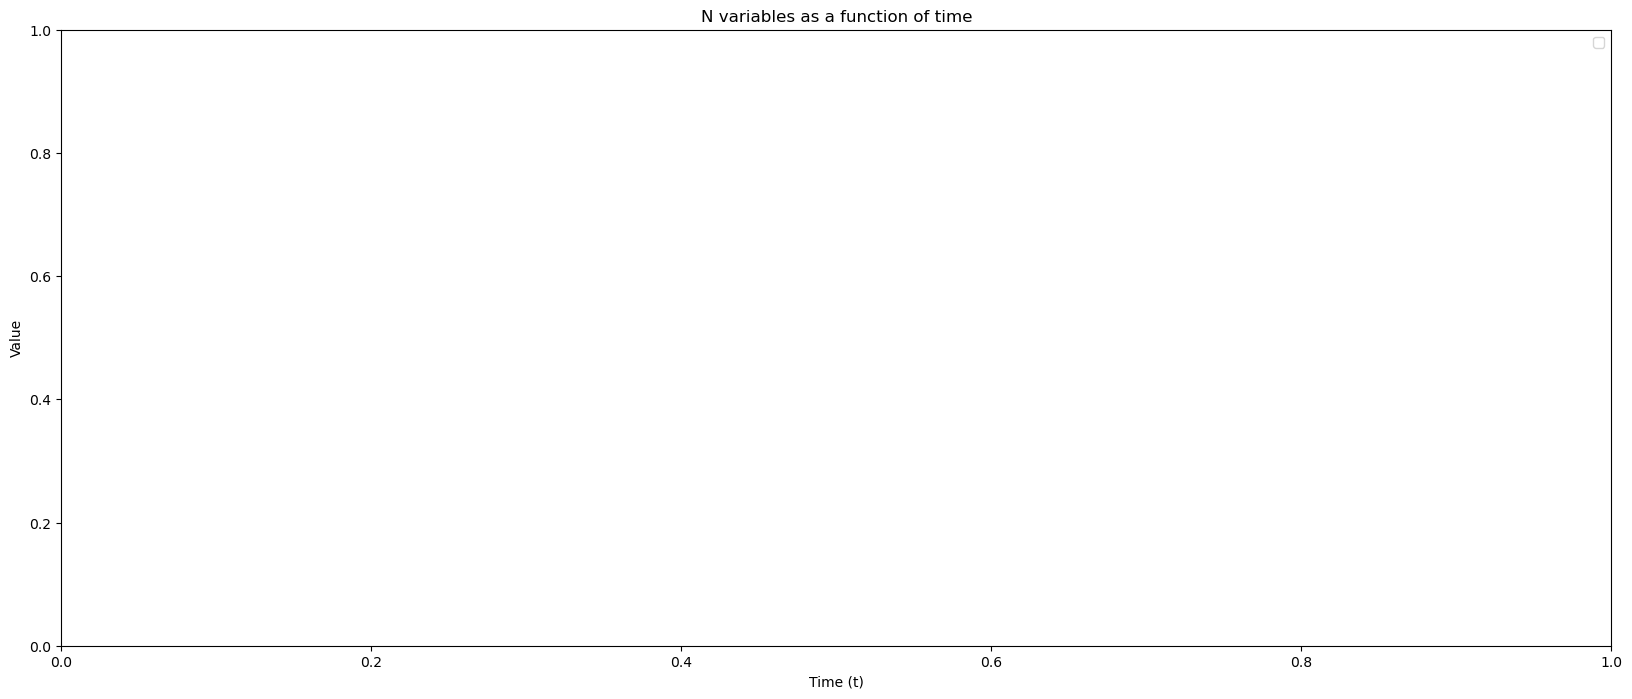

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


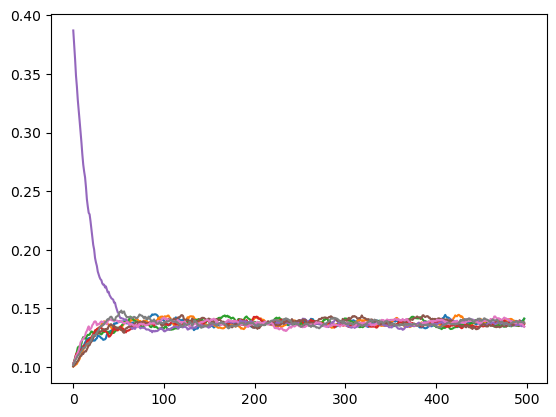

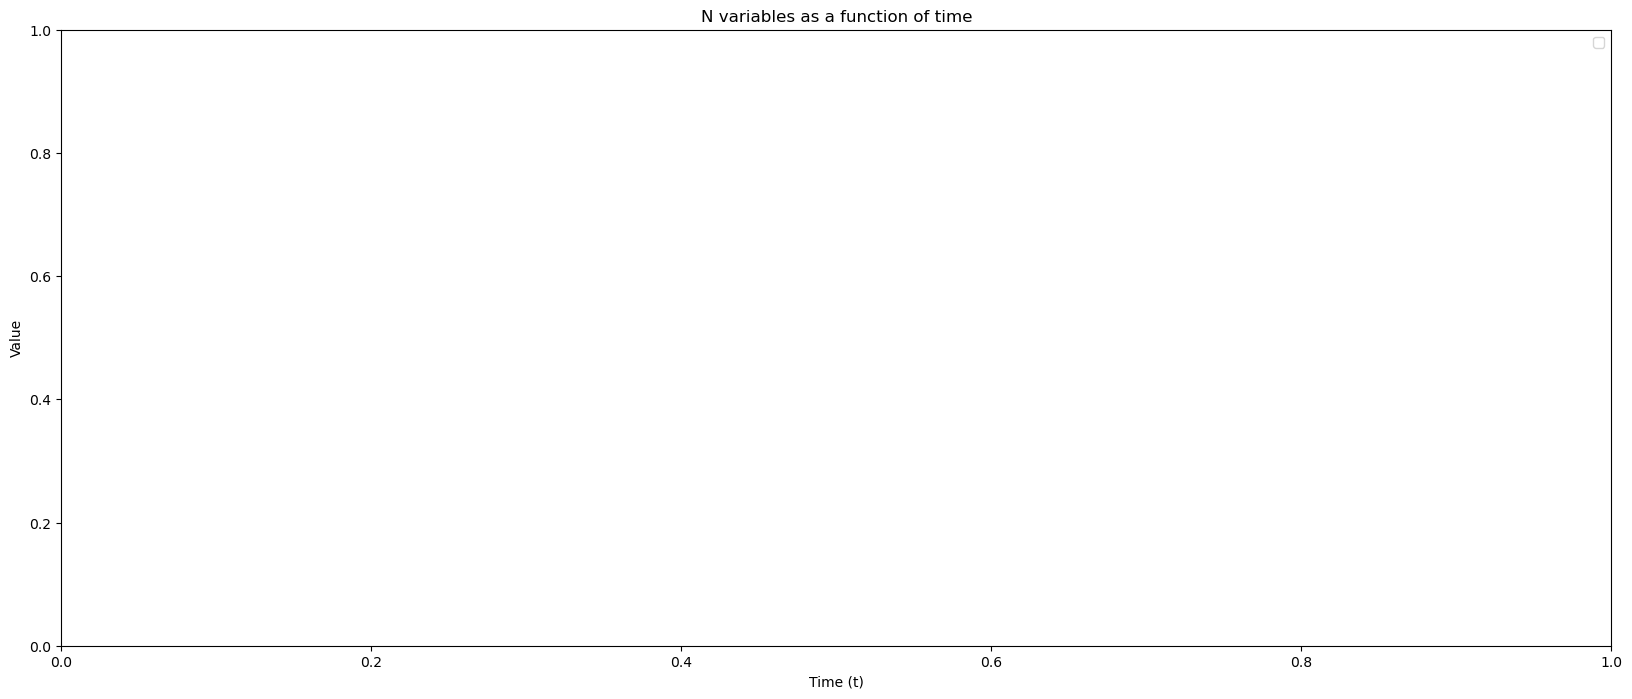

In [19]:
for conn in [ "c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]:
    pops = get_pops(newdata1,num,conn,"random").tolist()
    data=ensemble_averaged_one_point_measures_mean_std(pops)[0]
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    
    # Plot each number as a function of t
    for i, y_values in enumerate(data_transposed):
        plt.plot(t, y_values, label=f'Variable {i+1}')
    
    plt.figure(figsize=(20, 8))

    # Add labels and legend
    plt.xlabel('Time (t)')
    plt.ylabel('Value')
    plt.title('N variables as a function of time')
    plt.legend()
    
    # Show the plot
    plt.show()

In [ ]:
for conn in ["c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]:
    pops = get_pops(newdata2,num,conn,"greedy").tolist()
    data=ensemble_averaged_one_point_measures_mean_std(pops)[0]
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    plt.figure(figsize=(20, 8))

    
    # Plot each number as a function of t
    for i, y_values in enumerate(data_transposed):
        plt.plot(t, y_values, label=f'Variable {i+1}')

    # Add labels and legend
    plt.xlabel('Time (t)')
    plt.ylabel('Value')
    plt.title('N variables as a function of time')
    plt.legend()
    
    # Show the plot
    plt.show()

In [ ]:
for conn in [ "c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]:
    pops = get_pops(newdata3,num,conn,"mimic").tolist()
    data=ensemble_averaged_one_point_measures_mean_std(pops)[0]
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    
    # Plot each number as a function of t
    for i, y_values in enumerate(data_transposed):
        plt.plot(t, y_values, label=f'Variable {i+1}')
    plt.figure(figsize=(20, 8))

    # Add labels and legend
    plt.xlabel('Time (t)')
    plt.ylabel('Value')
    plt.title('N variables as a function of time')
    plt.legend()
    
    # Show the plot
    plt.show()

In [ ]:
for conn in [ "c2_2local","c4_2local","c5_2local","c6_2local","cN_2local"]:
    pops = get_pops(newdata4,num,conn,"landscape_maximizes").tolist()
    data=ensemble_averaged_one_point_measures_mean_std(pops)[0]
    num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
    t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]
    
    data=np.array(data[1:499])
    data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]
    
    
    # Plot each number as a function of t
    for i, y_values in enumerate(data_transposed):
        plt.plot(t, y_values, label=f'Variable {i+1}')
    plt.figure(figsize=(20, 8))

    # Add labels and legend
    plt.xlabel('Time (t)')
    plt.ylabel('Value')
    plt.title('N variables as a function of time')
    plt.legend()
    
    # Show the plot
    plt.show()